EM 589: Practical Machine Learning for Enginnering Analytics (Spring 2025)  
Instructor: Fred Livingston (fjliving@ncsu.edu)

Student: Mike Keating

Date: 6/24/25


# Homework 002: Using Supervised Learning to Titanic shipwreck survivors


This is the legendary Titanic ML competition.
Use a machine learning to create a supervised learning classifier model that predicts which passengers survived the Titanic shipwreck.


## Prepare the Data for Machine Learning Algorithms


In [1]:
import pandas as pd

titanic_df = pd.read_csv("datasets/train.csv", index_col="PassengerId")

### Take a Quick Look at the Data Structure


In [2]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Task 1: Data Wrangling Cleaning [ 15pts ]


- Transform the input fearture 'Sex' from an object data type to int64 [ 5pts ]


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic_df.Sex)
titanic_df.Sex = le.transform(titanic_df.Sex)
titanic_df.Sex

PassengerId
1      1
2      0
3      0
4      0
5      1
      ..
887    1
888    0
889    0
890    1
891    1
Name: Sex, Length: 891, dtype: int64

- Remove all other Features with the object data type [5pts]


In [6]:
# Drop columns

titanic_df = titanic_df.select_dtypes(exclude="object")
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 55.7 KB


- Notice that some Features contain NULL elements, Remove all NAN from data set [5pts]


In [7]:
# Drop rows with missing values
titanic_df.dropna(inplace=True)
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


#### Your Final DataFrame should look something like the image below

<img src="images/x_trained_df.png" alt="drawing" width="400"/>


### Task 2: Using the Correlation Matrix, Determine the Top 5 paramaters in order of significance for predicting Survival [10 pts]


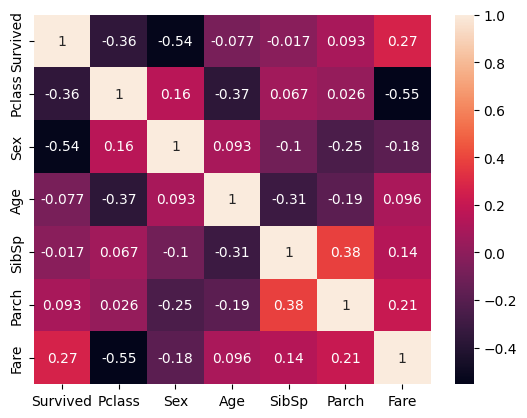

The top 5 features to predict survavival are: ['Sex', 'Pclass', 'Fare', 'Parch', 'Age']


In [8]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

cov_matrix = pd.DataFrame.corr(titanic_df)
sn.heatmap(cov_matrix, annot=True)
plt.show()

# To get the top 5 features, we will grab the largest magnitude covariance values
top_features = cov_matrix.Survived.drop(labels="Survived").abs().nlargest(5).index.tolist()
print(f"The top 5 features to predict survavival are: {top_features}")

### Task 3. Create a Test, and Validation Set

Using a three-way Holdout Method with a random seed of 123 and 20% test size percentage
creat a training, validation, and test set using the Top features from the feature correlation to predict output = "Survived"


<img src="images/holdout-tuning.png" alt="drawing" width="400"/>


In [10]:
y = titanic_df["Survived"]
X = titanic_df[top_features]

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.2, shuffle=True, random_state=123, stratify=y_temp)

### Task 5: Using Logistic Regression, KNN, Stochastic Gradient Descent, determine models training and validation, accuracy and optimized hyperparams to best predict Survival Rate [ 60 pts ]


#### Logistic Regression Model

- Model Implementation [5 pts]
- Training Accuracy [5pts]
- Validation Accuracy [5pts]


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Let's first use the default hyperparameters
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression())
# Create a Logistic Regression model
pipe_lr.fit(X_train, y_train)

pipe_lr.predict(X_valid)

# Let's evaluate the model
train_accuracy = pipe_lr.score(X_train, y_train)
valid_accuracy = pipe_lr.score(X_valid, y_valid)
print(f"Train accuracy: {train_accuracy:.3f}, Validation accuracy: {valid_accuracy:.3f}")

Train accuracy: 0.783, Validation accuracy: 0.800


Let's do some hyperparameter tuning by performing a GridSearch over our regularization strength hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    "logisticregression__C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 10000],
    "logisticregression__penalty": ["l2"],
}
grid_lr = GridSearchCV(pipe_lr, param_grid, cv=5, scoring="accuracy", n_jobs=-1, error_score="raise")
grid_lr.fit(X_train, y_train)

# Evaluate the model
train_accuracy_lr = grid_lr.score(X_train, y_train)
valid_accuracy_lr = grid_lr.score(X_valid, y_valid)
print(f"Best hyperparameters: {grid_lr.best_params_}")
print(f"Best cross-validation accuracy: {grid_lr.best_score_:.3f}")
print(f"Test accuracy: {grid_lr.score(X_test, y_test):.3f}")
print(f"Validation accuracy: {valid_accuracy_lr:.3f}")

Best hyperparameters: {'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}
Best cross-validation accuracy: 0.778
Test accuracy: 0.818
Validation accuracy: 0.800


In [70]:
# Let's save our best logistic regression model and results in a list for later
lr_model_info = ["Logistic Regression", grid_lr.best_estimator_, train_accuracy_lr, valid_accuracy_lr, grid_lr.score(X_test, y_test)]


#### KNeighborsClassifier Model

n_neighbors = [ 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

- Model Implementation [5 pts]
- Training Accuracy [5pts]
- Validation Accuracy [5pts]
- Optimal N_neighbors [5pts]
- Describe the relationship between training and validation accuracy [5pts]


In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn_models = []
acc_knn = []

# Recall from our previous instructions to use odd n_neighbors for binary classification
n_neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 2]

param_grid = {
    "kneighborsclassifier__n_neighbors": n_neighbors,
}

grid_knn = GridSearchCV(make_pipeline(StandardScaler(), KNeighborsClassifier()), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_knn.fit(X_train, y_train)

# Evaluate the model
train_accuracy_knn = grid_knn.score(X_train, y_train)
valid_accuracy_knn = grid_knn.score(X_valid, y_valid)
print(f"Best hyperparameters for KNN: {grid_knn.best_params_}")
print(f"Best cross-validation accuracy for KNN: {grid_knn.best_score_:.3f}")
print(f"Test accuracy for KNN: {grid_knn.score(X_test, y_test):.3f}")
print(f"Validation accuracy for KNN: {valid_accuracy_knn:.3f}")

# Saving our best KNN model
knn_model_info = ["KNN", grid_knn.best_estimator_, train_accuracy_knn, valid_accuracy_knn, grid_knn.score(X_test, y_test)]

Best hyperparameters for KNN: {'kneighborsclassifier__n_neighbors': 11}
Best cross-validation accuracy for KNN: 0.789
Test accuracy for KNN: 0.818
Validation accuracy for KNN: 0.800


### Stochastic Gradient Descent

- Model Implementation [10 pts]
- Training Accuracy [5pts]
- Validation Accuracy [5pts]


In [72]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

# Create a Stochastic Gradient Descent model
pipe_sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
pipe_sgd.fit(X_train, y_train)
grid_sgd = GridSearchCV(
    pipe_sgd,
    param_grid={
        "sgdclassifier__loss": ["hinge", "log_loss", "squared_hinge"],
        "sgdclassifier__penalty": ["l2", "l1", "elasticnet"],
        "sgdclassifier__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 10000],
    },
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)
grid_sgd.fit(X_train, y_train)

# Evaluate the model
train_accuracy_sgd = grid_sgd.score(X_train, y_train)
valid_accuracy_sgd = grid_sgd.score(X_valid, y_valid)
print(f"Best hyperparameters for SGD: {grid_sgd.best_params_}")
print(f"Best cross-validation accuracy for SGD: {grid_sgd.best_score_:.3f}")
print(f"Test accuracy for SGD: {grid_sgd.score(X_test, y_test):.3f}")
print(f"Validation accuracy for SGD: {valid_accuracy_sgd:.3f}")

# Saving our best SGD model
sgd_model_info = ["SGD", grid_sgd.best_estimator_, train_accuracy_sgd, valid_accuracy_sgd, grid_sgd.score(X_test, y_test)]

Best hyperparameters for SGD: {'sgdclassifier__alpha': 0.01, 'sgdclassifier__loss': 'squared_hinge', 'sgdclassifier__penalty': 'elasticnet'}
Best cross-validation accuracy for SGD: 0.785
Test accuracy for SGD: 0.825
Validation accuracy for SGD: 0.783


### Task 6: Choose the best Model and evaulate its performance on the test data set [ 15 pts ]

- Best Model [5 pts]
- Test Accuracy [5 pts]
- How does the Test accuracy differ from the validation accuracy? [5 pts]


In [ ]:
# Putting all model information into a list
model_info = [lr_model_info, knn_model_info, sgd_model_info]
# Creating a DataFrame to summarize the model performance
model_performance_df = pd.DataFrame(model_info, columns=["Model", "Best Estimator", "Train Accuracy", "Validation Accuracy", "Test Accuracy"])
model_performance_df


,Model,Best Estimator,Train Accuracy,Validation Accuracy,Test Accuracy
0,Logistic Regression,"(StandardScaler(), LogisticRegression(C=1, max...",0.782895,0.800000,0.818182
1,KNN,"(StandardScaler(), KNeighborsClassifier(n_neig...",0.817982,0.800000,0.818182
2,SGD,"(StandardScaler(), SGDClassifier(alpha=0.01, l...",0.785088,0.782609,0.825175


Test accuracy differs from validation accuracy in that test accuracy is the correct proportion of predictions on an unseen dataset - that is the test dataset was not used in model fitting or hyperparameter tuning and cross-validation. The validation dataset is a holdout subset of the training data, which is not used in fitting but IS used in hyperparameter tuning.

From our model summaries above, we see that Logistic Regression and KNN both share the highest validation accuracy of 0.8.

KNN has a larger train accuracy than validation accuracy, which means that it may have a slight problem with overfitting.

SGD showed the highest test accuracy at 0.825175. SGD also had the smallest difference between training and validation accuracies.

We will select SGD as our model of choice.

In [97]:
# Reading the test.csv
titanic_test_df = pd.read_csv("datasets/test.csv", index_col="PassengerId")

# Preprocessing the test data like we did for the training data
le.fit(titanic_test_df.Sex)
titanic_test_df.Sex = le.transform(titanic_test_df.Sex)
titanic_test_df.Sex
titanic_test_df = titanic_test_df.select_dtypes(exclude="object")
titanic_test_df.dropna(inplace=True)
# Encode Sex column

X = titanic_test_df[top_features]


# Predict
sgd_model = model_performance_df[model_performance_df["Model"] == "SGD"]["Best Estimator"].values[0]

predictions = sgd_model.predict(X)

# Let's store the predictions in a DataFrame
predictions_df = pd.DataFrame({"PassengerId": titanic_test_df.index, "Survived": predictions})

predictions_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
